In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df['age_bin'] = pd.cut(df['Age'], bins = 20)

<AxesSubplot:xlabel='Survived', ylabel='age_bin'>

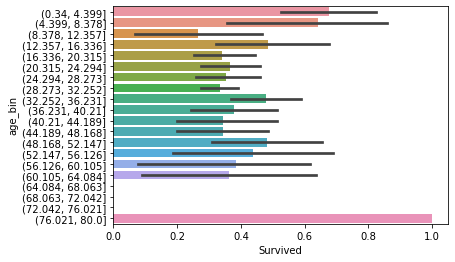

In [20]:
sns.barplot(data = df, y = df['age_bin'], x = df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

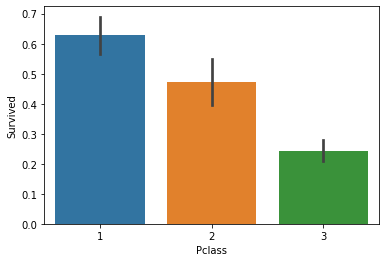

In [25]:
sns.barplot(data = df, x = df['Pclass'], y = df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

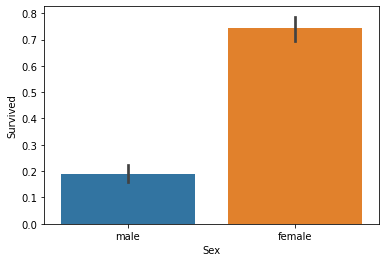

In [26]:
sns.barplot(data = df, x = df['Sex'], y = df['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

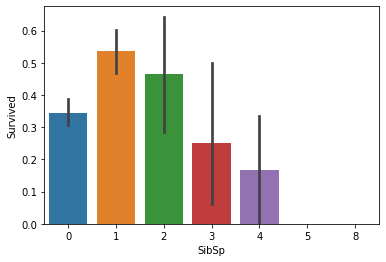

In [28]:
sns.barplot(data = df, x = df['SibSp'], y = df['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

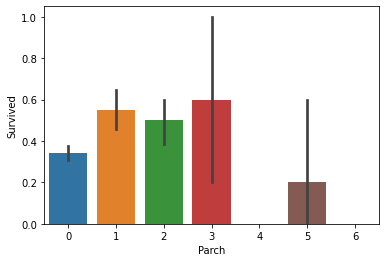

In [29]:
sns.barplot(data = df, x = df['Parch'], y = df['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

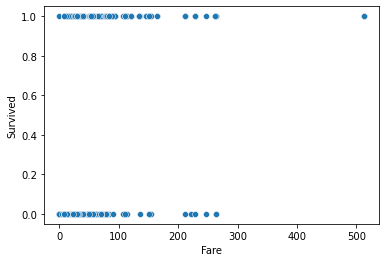

In [31]:
sns.scatterplot(data = df, x = df['Fare'], y = df['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

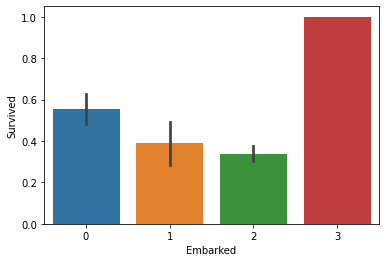

In [38]:
sns.barplot(data = df, x = df['Embarked'], y = df['Survived'])

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
df = df.apply(LabelEncoder().fit_transform)

In [51]:
Features = ['Pclass','Sex','age_bin','SibSp','Parch','Fare']

In [52]:
X = df[Features]
y = df['Survived']

In [53]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =3)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train,y_train)

LogisticRegression()

In [59]:
lr.score(X_test,y_test)

0.776536312849162

In [60]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace = True)

In [63]:
df_test['age_bin'] = pd.cut(df_test['Age'], bins = 20)

In [66]:
df_test = df_test.apply(LabelEncoder().fit_transform)
Xtest = df_test[Features]

In [67]:
Xtest = scaler.transform(Xtest)

In [69]:
result = lr.predict(Xtest)

In [71]:
df_test['Survived'] = result

In [79]:
df_test[['PassengerId', 'Survived']]#.to_csv('titanic_result', index = False)

,PassengerId,Survived
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
413,413,0
414,414,1
415,415,0
416,416,0


In [80]:
df2 = df_test = pd.read_csv('test.csv')
df2['Survived'] = result
df2[['PassengerId', 'Survived']].to_csv('titanic_result', index = False)